In [1]:
import numpy as np
from scipy.special import gamma

import matplotlib.pyplot as plt

In [2]:
def students_t_pdf(x, nu=3, mu=1, sig=1):
    w = (x-mu)/sig
    r = 1 + w**2/nu
    r = np.power(r, -0.5*(nu+1))
    r *= gamma(0.5*(nu + 1))/gamma(0.5*nu)
    r /= sig*np.sqrt(np.pi * nu)
    return r

In [3]:
def fake_students_t_pdf(x, nu=3, mu=1, sig=1):
    return mu*x + nu -sig

### Generate data with Gaussian noise

\begin{align}
y = f(x) + n
\end{align}

Fetch some $\{y_i, x_i\}$. $n$ is a Gaussian. $f$ follows `student_t_pdf` above

In [4]:
injection_parameters = dict(nu=3, mu=1, sig=1)

In [5]:
x = np.linspace(-4, 4, 100)

In [6]:
sigma = 0.5

In [7]:
data = students_t_pdf(x, **injection_parameters) + np.random.normal(0, sigma, len(x))
#data = students_t_pdf(x, **injection_parameters) + np.random.uniform(len(x))

Text(0, 0.5, 'y')

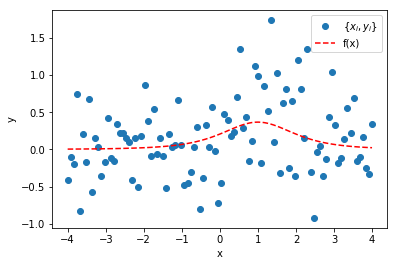

In [8]:
fig, ax = plt.subplots()
ax.plot(x, data, 'o', label='$\{x_i, y_i\}$')
ax.plot(x, students_t_pdf(x, **injection_parameters), '--r', label='f(x)')
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')

In [9]:
import bilby
from bilby.core.likelihood import GaussianLikelihood
from bilby.core.prior import Uniform, DeltaFunction

In [10]:
priors = dict()
priors['mu'] = Uniform(-3, 3, name='mu', latex_label='m')
priors['nu'] = Uniform(2.9, 3.1, name='nu', latex_label='n')
priors['sig'] = DeltaFunction(1.0, name='sig', latex_label='s')

In [11]:
log_l = GaussianLikelihood(x, data, students_t_pdf, sigma)

In [12]:
result = bilby.run_sampler(
    likelihood=log_l, priors=priors, sampler='dynesty',
    nlive=500, npool=2, injection_parameters=injection_parameters,
    outdir='./student_t',
    label='student_t'
)

00:46 bilby INFO    : Running for label 'student_t', output will be saved to './student_t'
00:46 bilby INFO    : Search parameters:
00:46 bilby INFO    :   mu = Uniform(minimum=-3, maximum=3, name='mu', latex_label='m', unit=None, boundary=None)
00:46 bilby INFO    :   nu = Uniform(minimum=2.9, maximum=3.1, name='nu', latex_label='n', unit=None, boundary=None)
00:46 bilby INFO    :   sig = 1.0
00:46 bilby INFO    : Single likelihood evaluation took 1.699e-04 s


0it [00:00, ?it/s]

00:46 bilby INFO    : Using sampler Dynesty with kwargs {'bound': 'multi', 'sample': 'rwalk', 'verbose': True, 'periodic': None, 'reflective': None, 'check_point_delta_t': 600, 'nlive': 500, 'first_update': None, 'walks': 100, 'npdim': None, 'rstate': None, 'queue_size': 2, 'pool': None, 'use_pool': None, 'live_points': None, 'logl_args': None, 'logl_kwargs': None, 'ptform_args': None, 'ptform_kwargs': None, 'enlarge': 1.5, 'bootstrap': None, 'vol_dec': 0.5, 'vol_check': 8.0, 'facc': 0.2, 'slices': 5, 'update_interval': 300, 'print_func': <bound method Dynesty._print_func of <bilby.core.sampler.dynesty.Dynesty object at 0x7efcddc0f9b0>>, 'dlogz': 0.1, 'maxiter': None, 'maxcall': None, 'logl_max': inf, 'add_live': True, 'print_progress': True, 'save_bounds': False, 'n_effective': None, 'maxmcmc': 5000, 'nact': 5}
00:46 bilby INFO    : Checkpoint every check_point_delta_t = 600s
00:46 bilby INFO    : Using dynesty version 1.0.1
00:46 bilby INFO    : Generating initial points from the pri

2615it [00:00, 8476.81it/s, bound:447 nc:  1 ncall:2.3e+05 eff:1.1% logz=-58.78+/-0.10 dlogz:0.100>0.1]

00:46 bilby INFO    : Written checkpoint file ./student_t/student_t_resume.pickle
00:46 bilby INFO    : Writing 1059 current samples to ./student_t/student_t_samples.dat
00:46 bilby INFO    : Starting to close worker pool.
00:46 bilby INFO    : Finished closing worker pool.
00:46 bilby INFO    : Sampling time: 0:00:29.300186


00:46 bilby INFO    : Summary of results:
nsamples: 3115
ln_noise_evidence:    nan
ln_evidence: -58.684 +/-  0.091
ln_bayes_factor:    nan +/-  0.091



/home/deep/miniconda3/envs/bilby/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/home/deep/miniconda3/envs/bilby/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


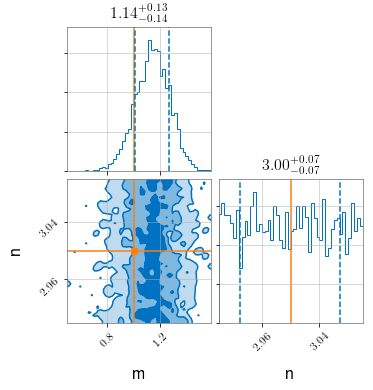

In [13]:
result.plot_corner()